In [3]:
from skimage.feature import hog
from skimage.io import imread
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import os
%matplotlib inline

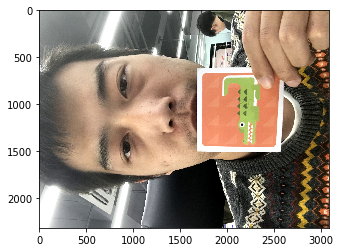

In [4]:
img_path = "./source/images/IMG_1921.jpg"
img=Image.open(img_path)
imshow(np.asarray(img))

In [40]:
np.array(img).shape

(2320, 3088, 3)

In [42]:
type(img.convert())

PIL.Image.Image

In [5]:
def resize_by_short(img, short_len=64, crop=False):
    """按照短边进行所需比例缩放"""
    (x, y) = img.size
    if x>y:
        y_s=short_len
        x_s=int(x*y_s/y)
        x_l=int(x_s/2)-int(short_len/2)
        x_r=int(x_s/2)+int(short_len/2)
        img = img.resize((x_s, y_s))
        if crop:
            box = (x_l, 0, x_r, short_len)
            img = img.crop(box)
    else:
        x_s=short_len
        y_s=int(y*x_s/x)
        y_l=int(y_s/2)-int(short_len/2)
        y_r=int(y_s/2)+int(short_len/2)
        img = img.resize((x_s, y_s))
        if crop:
            box = (0, y_l, short_len, y_r)
            img = img.crop(box)
    return img

In [6]:
def get_center_img(img, short_len=128):
    img = resize_by_short(img, short_len=short_len*2)
    (x, y) = img.size
    box = (x//2-short_len*3//4, y//2-short_len*3//4, x//2+short_len*3//4, y//2+short_len*3//4)
    img = img.crop(box).resize((short_len,short_len))
    return img

In [7]:
def devide_4_pieces(img, short_len=128):
    (x, y) = img.size
    boxs = []
    boxs.append((0,0,x//2,y//2))
    boxs.append((0,y//2,x//2,y))
    boxs.append((x//2,0,x,y//2))
    boxs.append((x//2,y//2,x,y))
    imgs = [img.crop(i).resize((short_len,short_len)) for i in boxs]
    return imgs


In [8]:
def get_6_pics(img, short_len=128):
    imgs = []
    imgs.append(img.resize((short_len, short_len)))
    imgs.append(get_center_img(img, short_len=short_len))
    imgs.extend(devide_4_pieces(img, short_len=short_len))
    return imgs

In [9]:
imgs=get_6_pics(img)

In [34]:
x=np.random.rand(10000000,5)

In [35]:
y=x[:,0]

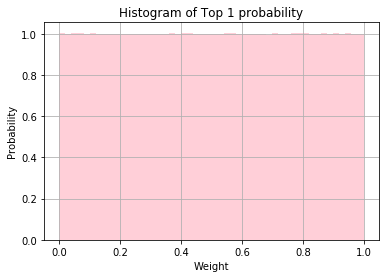

In [38]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(y, 50, density=True, facecolor='pink', alpha=0.75)
plt.xlabel('Weight')
plt.ylabel('Probability')
plt.title('Histogram of Top 1 probability')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

In [39]:
img.save("test.jpg")

# Remove unpaired images

In [66]:
import os
import shutil
import math

In [97]:
prefix = "/Users/miracle/Downloads/ori_labels/"
filelist = os.listdir(prefix)
pure_names = [os.path.splitext(name)[0] for name in filelist]
for i in pure_names:
    if pure_names.count(i) == 1:
        print("==> Index:",i,"Removing...")
        names_tmp = [prefix+i+'.jpg', prefix+i+'.txt']
        for name_tmp in names_tmp:
            if os.path.exists(name_tmp):
                os.remove(name_tmp)

==> Index: 1001022 Removing...
==> Index: 0001257 Removing...
==> Index: 0000820 Removing...
==> Index: 1000738 Removing...
==> Index: 0001928 Removing...
==> Index: 1002890 Removing...
==> Index: 1000739 Removing...
==> Index: 0000821 Removing...
==> Index: 1000513 Removing...
==> Index: 0000955 Removing...
==> Index: 0000969 Removing...
==> Index: 0000558 Removing...
==> Index: 1001547 Removing...
==> Index: 0000764 Removing...
==> Index: 0000994 Removing...
==> Index: 0000980 Removing...
==> Index: 0000957 Removing...
==> Index: 1000511 Removing...
==> Index: 1000505 Removing...
==> Index: 1002892 Removing...
==> Index: 1000921 Removing...
==> Index: 1002139 Removing...
==> Index: 1000504 Removing...
==> Index: 0000956 Removing...
==> Index: 0000759 Removing...
==> Index: 0000765 Removing...
==> Index: 1001020 Removing...
==> Index: 1001544 Removing...
==> Index: 1001018 Removing...
==> Index: 0000749 Removing...
==> Index: 0000991 Removing...
==> Index: 0000761 Removing...
==> Inde

# Rename Pictures and pack them

In [102]:
name_pairs = [('wl', 400), ('zjl', 500)]#[('zzy', 600),('shh', 500), 
prefix = "/Users/miracle/Downloads/ori_labels/"
filelist = os.listdir(prefix)
pure_names = list(set([os.path.splitext(name)[0] for name in filelist]))
pure_names = [name for name in pure_names if not name.startswith('.')]
pointer=1100

for name_str,num_label in name_pairs:
    dir_prefix = "/Users/miracle/Downloads/labels_finished/"+name_str+'/'
    
    print(len(filelist))
    names_part = pure_names[pointer:pointer+num_label]
    
    for i, old_name in enumerate(names_part):
        if i%50 == 0:
            if i//50 != 0:
                shutil.make_archive(new_dir_name[:-1], 'zip', new_dir_name)
            new_dir_name = dir_prefix+name_str+'_'+str(i//50)+'_50/' 
            os.makedirs(new_dir_name)
        shutil.copy(prefix+old_name+'.jpg', new_dir_name+str(i)+'_'+name_str+'.jpg')
        shutil.copy(prefix+old_name+'.txt', new_dir_name+str(i)+'_'+name_str+'.txt')
    shutil.make_archive(new_dir_name[:-1], 'zip', new_dir_name)
    pointer += num_label

4666
4666


In [95]:
name_str = 'wl'
prefix = "/Users/miracle/Downloads/wl/"
new_prefix = "/Users/miracle/Downloads/wl_copy/"
dir_prefix = "/Users/miracle/Downloads/labels_finished/"
filelist = os.listdir(prefix)
print(len(filelist))
pure_names = list(set([os.path.splitext(name)[0] for name in filelist]))
for i, old_name in enumerate(pure_names):
#     try:
    shutil.copy(prefix+old_name+'.jpg', new_prefix+str(i)+'_'+name_str+'.jpg')
    shutil.copy(prefix+old_name+'.txt', new_prefix+str(i)+'_'+name_str+'.txt')
#     except:
#         pass
dir_num = math.ceil(len(pure_names)/50)
for i in range(dir_num):
    new_dir_name = dir_prefix+name_str+'_'+str(i)+'_50/' 
    os.mkdir(new_dir_name)
    for j in range(50):
        pure_names_2 = [str(i*50+j)+'_'+name_str+'.jpg', str(i*50+j)+'_'+name_str+'.txt']
        shutil.copy(new_prefix+pure_names_2[0], new_dir_name+pure_names_2[0])
        shutil.copy(new_prefix+pure_names_2[1], new_dir_name+pure_names_2[1])
    shutil.make_archive(new_dir_name[:-1], 'zip', new_dir_name)

1088


FileNotFoundError: [Errno 2] No such file or directory: '/Users/miracle/Downloads/wl_copy/544_wl.jpg'

In [63]:
math.ceil(6/5)

2

In [68]:
p='qwer'
p[:-1]

'qwe'